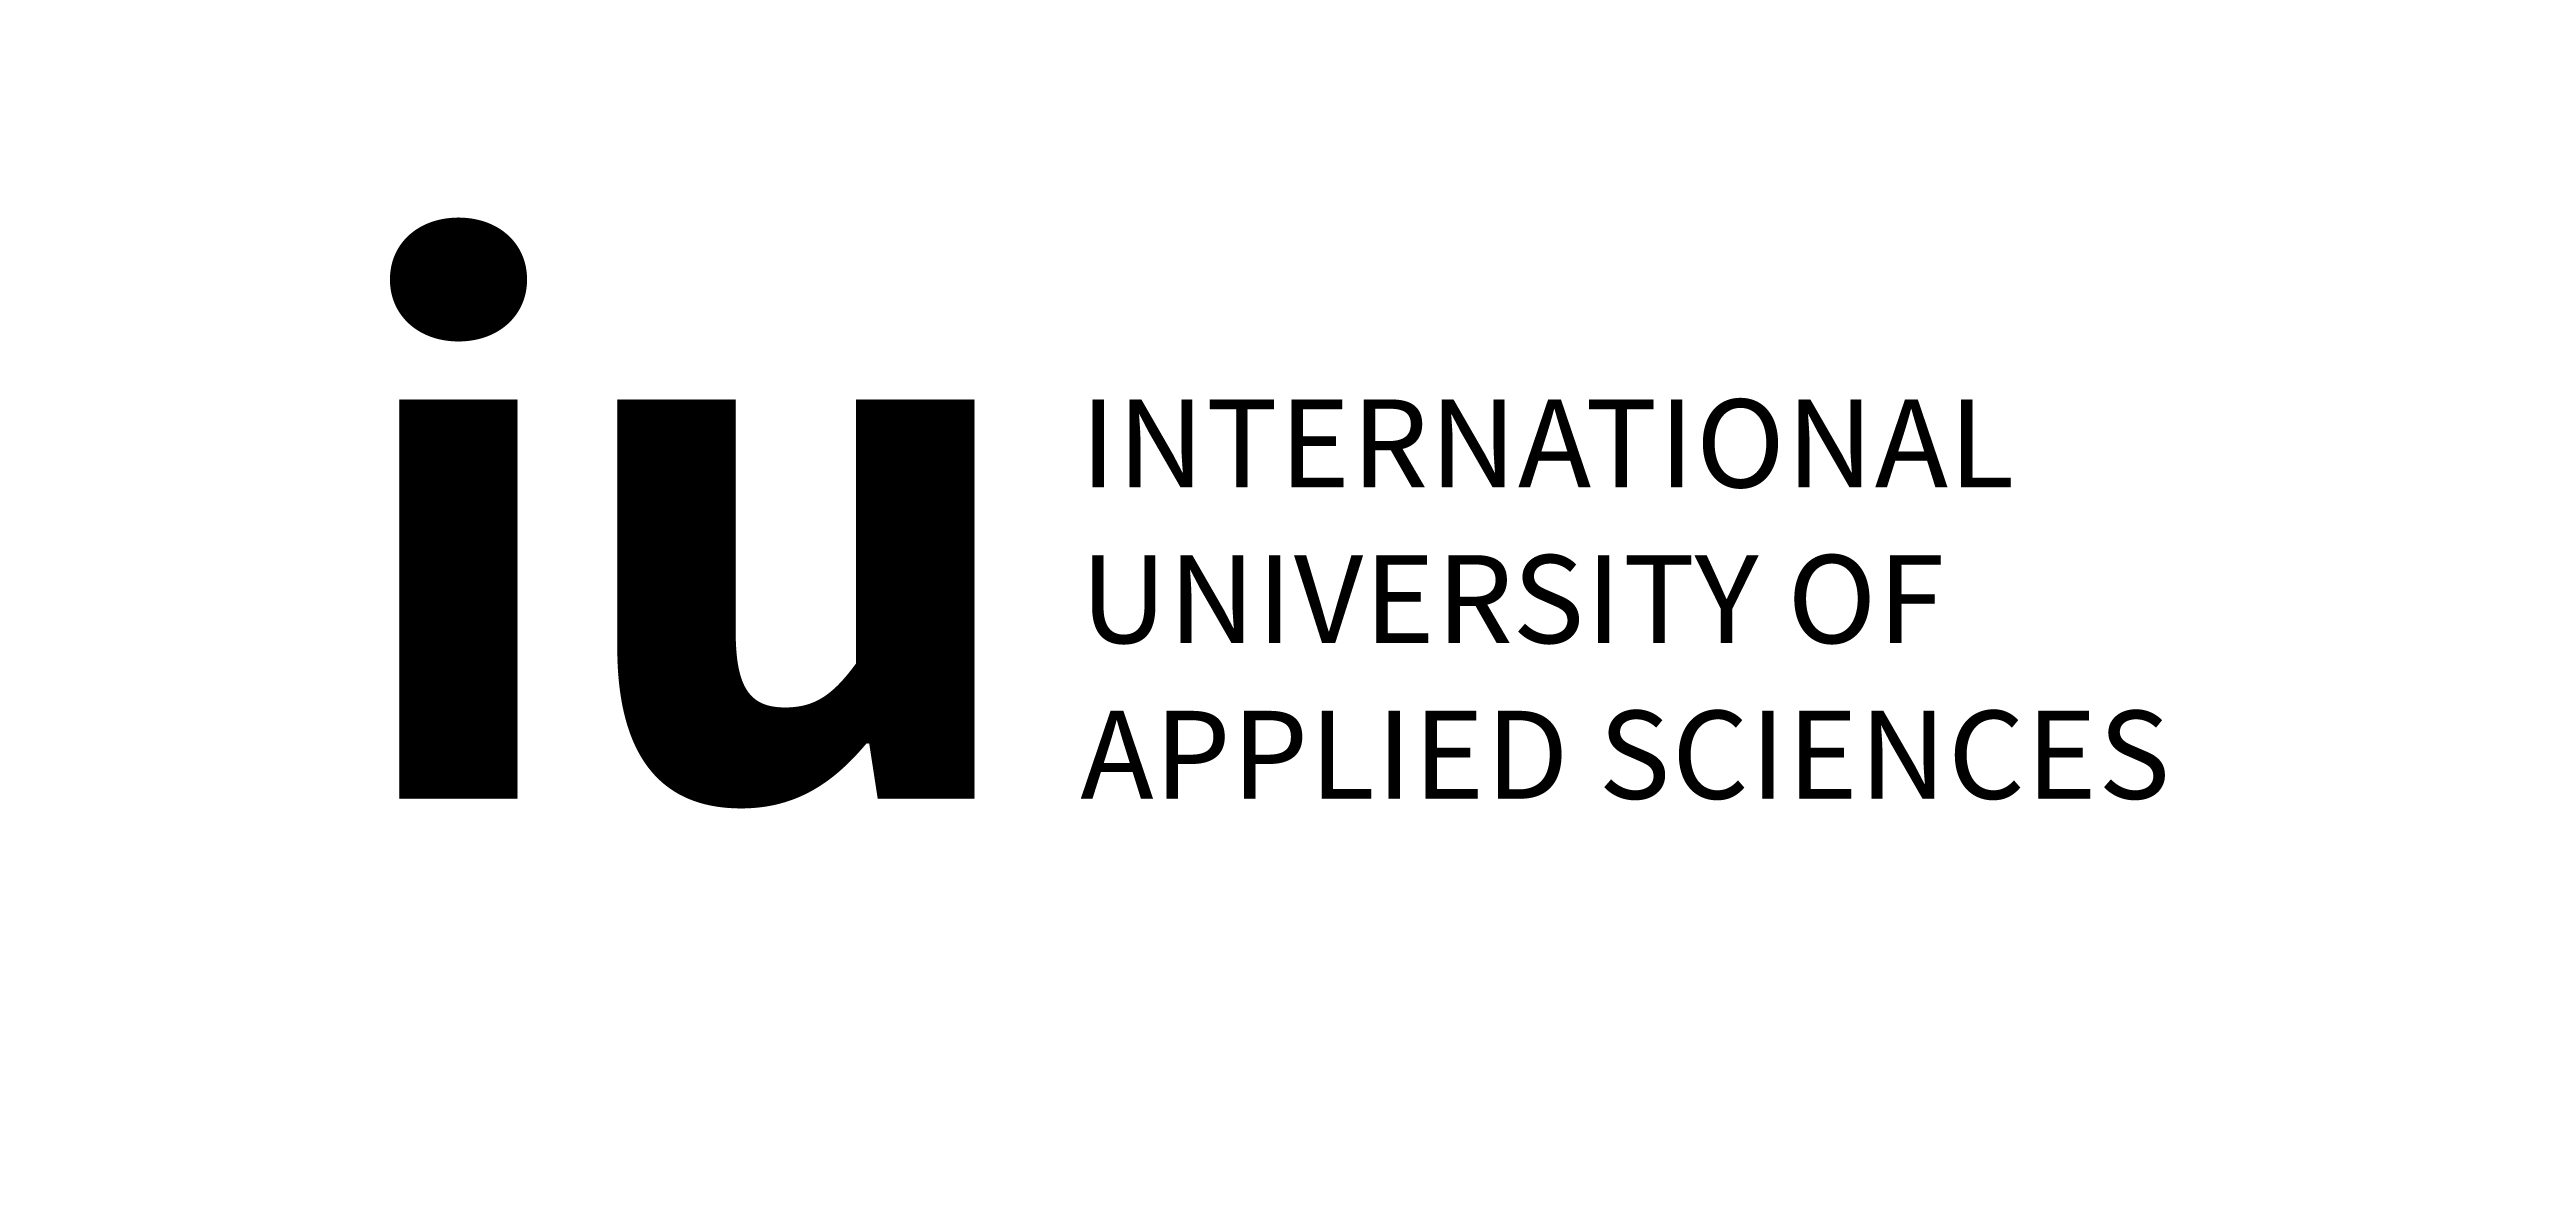


## AGYEMANG Alex
### Student ID: 92000614
 
### Programme: MSc. Data Science

### Course: Model Engineering

### Course Code: DLMDSME01

### Project Topic: Automation Of Standby Duty Planning For Rescue Drivers 
###                               Via A Forecasting Model 

### Date: 24/02/2023





### Table of Contents

1.	List of Abbreviations	
2.	Introduction	
3.    Main Content	
3.1     Business Understanding	
3.2     Data Handling	
3.3.     Data Preparation	
3.3.1.  Feature Engineering	
3.3.2. Feature Selection	
3.4. Modeling	
3.5 Model Evaluation	
3.6 Deployment	
4. Conclusion	
5. Bibliography	
6. ListofAppendices	
6.1.  Appendix A	
6.2.  Appendix B	



### 1. List of Abbreviations 
    n_sick - number of drivers called sick on duty 
    calls - number of emergency calls 
    n_duty - number of drivers on duty available 
    n_sby - number of standby resources available 
    sby_need - number of standbys, which are activated on a given day 
    dafted - number of additional drivers needed due to not enough standbys 
    TS – Time Series
    CRISP-DM     -   Cross-Industry Standard Process for Data Mining
    BRCRS     -      Berlin Red Cross Rescue Service
    HR   –     Human Resource


### 2. Introduction
TS Data Analysis is a way of studying the characteristics of the response variable concerning time as the independent variable (Pandian 2021). To estimate the target variable in the name of predicting or forecasting, use the time variable as the point of reference. A TS represents a series of time-based orders. It would be Years, Months, Weeks, Days, Horus, Minutes, and Seconds. It is an observation from the sequence of discrete-time of successive intervals (Pandian 2021). 

TS forecasting plays a key role in many business and industrial problems because an accurate forecasting model is a crucial part of a data-driven decision-making system (Deng et al. 2022). In unstable or fast-changing market conditions, forecasting and planning must be swift and accurate (Wasserbacher and Spindler 2022). TS data are one of the most common data formats, capturing and recording information and activity in a wide range of applications. The capturing of a succession of observations indexed by time stamps initially allows for providing insights into the past evolution of some measurable quantity in any area involving temporal measurements through sensors, censuses, and transaction records (Dama and Sinoquet 2023). 

TS forecasting deals with the development of a TS over a specified future period, commonly known as the forecast horizon. TS forecasting is used in different types of domains with varied forecast horizons, temporal scales, and aggregation levels. TS forecasting is expanding continuously as the number and importance of use cases increase (Gürses-Tran and Monti 2022). 
Forecasting model design is problematic and laborious, and automating it can save data scientists time giving them the space to focus on determining, designing, and building new models. Manually building a forecasting pipeline for a specific use case is very tedious and hard because choosing pertinent methods for pipeline sections is iterative and requires specialist expertise (Meisenbacher et al. 2022).

This data science case study aims to create a predictive forecasting model that will automate standby drivers duty planning for Berlin Red Cross rescue drivers. The case study will be structured in the next section according to the CRISP-DM (Cross-Industry Standard Process for Data Mining), which comprises six phases: business understanding, data understanding, data preparation, modeling, assessment, and deployment (Hotz 2018). The second section will talk about each phase in details while third section summarise the entire study and its findings.


### 3.    Main Content

### 3.1     Business Understanding
Any good project begins with a deep understanding of the client’s needs. Data mining projects are no exception and CRISP-DM recognizes this. The Business Understanding phase focuses on understanding the objectives and requirements of the project (Hotz 2018). 
The goal of the BRCRS is to save people’s life by responding to home emergency calls and natural disasters. The BRCRS’s HR team is in charge of the daily scheduling of rescue drivers. Aside from the constant number of drivers assigned to duty each day, the HR department must also allocate some drivers to standby in case there is an emergency call. 

In the current plan, 90 rescue drivers are placed on standby each day, ready to respond if additional assistance is required. The existing scheduling plan is not much effective because the fixed number of backup drivers, which is 90, is either insufficient in some instances or abundant in certain situations. When there is a shortage, getting more drivers takes longer time eventually resulting in the loss of the valuable life of clients. This project seeks to assist HR in achieving an efficient method of scheduling the number of standby or awaiting rescue drivers required on daily basis. 

The following observations were made based on the information collected:
Periodic disparities impact the number of rescue backup drivers needed.
The number of rescue standby drivers needed is influenced by how many drivers are on duty calling sick. 
The number of emergency calls received determines the number of rescue standby drivers needed.
Weekends, public holidays, and the weather of the day can all influence the standby duty plan. 

The following business questions are addressed in this project: 
Is there a correlation between the number of standby rescue drivers and the number of drivers on duty who call in sick? 
Is there a relationship between the number of standby rescue drivers and the number of emergency calls received? 
Is the number of standby rescue drivers influenced by the seasons? 
Is there a need for more standby rescue drivers on weekends and holidays? 
Can the number of standby drivers be estimated with reasonable accuracy based on their attributes? 

This project’s datasets are obtained from BRCRS’s HR department's daily rescue driver schedules from April 2016 to May 2019. The objective of the project is to create a predictive regression model that will automate daily standby drivers. The success rate of this model is achieved if it can closely estimate at least 90% of the daily standby rescue drivers required each month. 

The following python's open-source library packages will be used to finish the project: </br>
holidays== 0.18</br>
joblib==1.1.0  </br>
jupyterlab==3.9.7  </br>
matplotlib==3.4.3   </br>
matplotlib-inline==0.1.2   </br>
pandas==1.3.4  </br>
pandas-profiling==3.2.0  </br>
scikit-learn==1.1.1  </br>
scipy==1.7.1  </br>
seaborn==0.12.2  </br> 
statsmodels==0.12.2  </br>
xgboost==1.5.0 </br>

The regression model, datasets, configuration files, and API designs needed to deploy the model to production will all be versioned in a git repository.




### 3.2.      Data Handling

Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks: Collect initial data, Describe data, Explore data, Verify data quality (Hotz 2018)
</br>

In [1]:
# to handle data
import pandas as pd
import numpy as np
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
# for ploting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.stats import t
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
# getting holidays in the year
import holidays
from workalendar.europe import Germany
# to save the model
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the sickness_table.csv dataset

data=0
try:
    data = pd.read_csv("sickness_table.csv")
except IOError as err:
    print(err)
# preview the data
print(data.head(2))

   Unnamed: 0        date  n_sick  calls  n_duty  n_sby  sby_need  dafted
0           0  01/04/2016      73   8154    1700     90         4       0
1           1  02/04/2016      64   8526    1700     90        70       0


</br>
The dataset is loaded from a CSV file with an index column and a date column. Dropping the index column of the dataset and displaying the datatypes of the columns. </br> </br>

In [3]:
# dropping the first column
data.drop('Unnamed: 0', axis=1, inplace= True)
# preview the data
print(data.head())

         date  n_sick  calls  n_duty  n_sby  sby_need  dafted
0  01/04/2016      73   8154    1700     90         4       0
1  02/04/2016      64   8526    1700     90        70       0
2  03/04/2016      68   8088    1700     90         0       0
3  04/04/2016      71   7044    1700     90         0       0
4  05/04/2016      63   7236    1700     90         0       0


In [4]:
# checking the data types
data.dtypes

date        object
n_sick       int64
calls        int64
n_duty       int64
n_sby        int64
sby_need     int64
dafted       int64
dtype: object

</br>
The date column is stored as an object, which is not expected for a date column. This column needs to be set to datetime.
</br></br>

In [5]:
data['date']= pd.to_datetime(data['date']) # Parse the date as datetime
print(data.info()) # Obtain more information on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1152 non-null   datetime64[ns]
 1   n_sick    1152 non-null   int64         
 2   calls     1152 non-null   int64         
 3   n_duty    1152 non-null   int64         
 4   n_sby     1152 non-null   int64         
 5   sby_need  1152 non-null   int64         
 6   dafted    1152 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 63.1 KB
None


</br>
The data type of the date's column has now been converted from object to datetime, this will allow date operations on it. The remaining column's data type are saved as numeric data types. Looking at the shape of the dataset for the number of rows and columns and also obtain a statistical summary of the dataset.
</br></br>

In [6]:
print(data.shape)

(1152, 7)


In [7]:
print(data.describe().T)

           count         mean          std     min     25%     50%      75%  \
n_sick    1152.0    68.808160    14.293942    36.0    58.0    68.0    78.00   
calls     1152.0  7919.531250  1290.063571  4074.0  6978.0  7932.0  8827.50   
n_duty    1152.0  1820.572917    80.086953  1700.0  1800.0  1800.0  1900.00   
n_sby     1152.0    90.000000     0.000000    90.0    90.0    90.0    90.00   
sby_need  1152.0    34.718750    79.694251     0.0     0.0     0.0    12.25   
dafted    1152.0    16.335938    53.394089     0.0     0.0     0.0     0.00   

              max  
n_sick      119.0  
calls     11850.0  
n_duty     1900.0  
n_sby        90.0  
sby_need    555.0  
dafted      465.0  


</br>
There are a total of 1152 rows and 7 columns in our dataset. For the columns sby_need and dafted, there appears to be an anomaly. More than 3 standard deviations separate the maximum values from their means. In later sections, we’ll look into the possibility of outliers and how to deal with them. </br></br>

Examine for missing values </br>


In [8]:
print(data.isnull().sum())

date        0
n_sick      0
calls       0
n_duty      0
n_sby       0
sby_need    0
dafted      0
dtype: int64


</br>
After exmanining the dataset, there are no missing values in our datasets. </br></br>

Extracting features such as the day of the month, month of the year, year, day of the week, weeks of the year, weekend, and public holidays by using datetime operations on the column date. </br>


In [9]:
df = data.copy() # to avoid permanent changes to the dataset
df['year'] = df['date'].dt.year # Get year from the date
df['month'] = df['date'].dt.month # get months from the year
df['day'] = df['date'].dt.day # Get days of the month
df['week'] = df['date'].dt.week # Get weeks of the year
df['week_day'] = df['date'].dt.day_name() # Get the days of the week
df['is_weekend'] = df['week_day'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0) 
# specify if day is weekend or not
# for public holidays
holiday_list = []
# Get list of public holidays in Germany
for i, v in holidays.Germany(years=[2016, 2017, 2018, 2019]).items():
    holiday_list.append(i)
df['holidays'] = df['date'].apply(lambda x: 1 if x in holiday_list else 0)
df = df.set_index(df.date) # set the date column as index
# drop the date column
df.drop('date', axis=1, inplace=True)
print(df.head(1))

            n_sick  calls  n_duty  n_sby  sby_need  dafted  year  month  day  \
date                                                                           
2016-01-04      73   8154    1700     90         4       0  2016      1    4   

            week week_day  is_weekend  holidays  
date                                             
2016-01-04     1   Monday           0         0  


</br>
Exploring the distribution of the target variable (sby_need) i.e. number of standbys, which are activated on a given day </br>

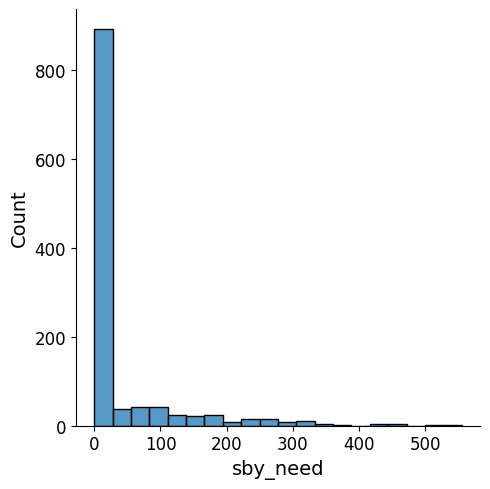

In [10]:
sns.displot(df['sby_need'], bins= 20)

<br>
Looking at the graph, the target variable is skewed towards the right and contains some massive values. </br></br> 
Ploting a boxplot of the target variable to obtain a clear understanding of the scale of outliers. </br>

<AxesSubplot: >

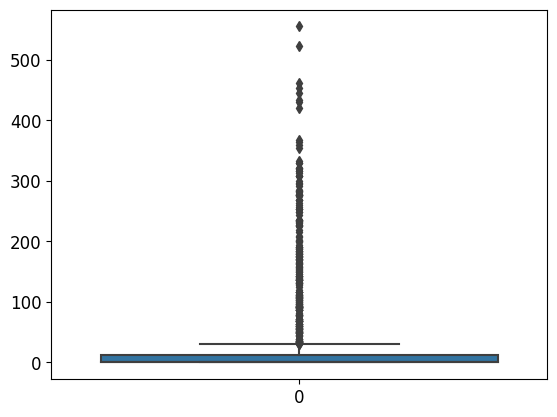

In [11]:
sns.boxplot(df['sby_need'])

</br> Observing the graph distribution of the boxplot above, realize there are a few extremely large outliers. I will analyze how it affects the distribution using logarithmic. Since the data contains more 0s, I will add a constant value of +1 to each value to transform the data and avoid division errors. Log transformation is a data transformation method in which it replaces each variable x with a log(x) (Feng et al. 2014). The log transformation, in other words, decreases or eliminates the skewness of our original data. </br></br>

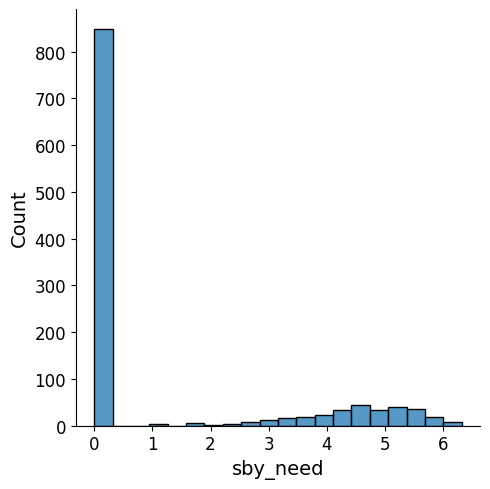

In [12]:
sns.displot(np.log(df['sby_need']+ 1), bins= 20)

<AxesSubplot: >

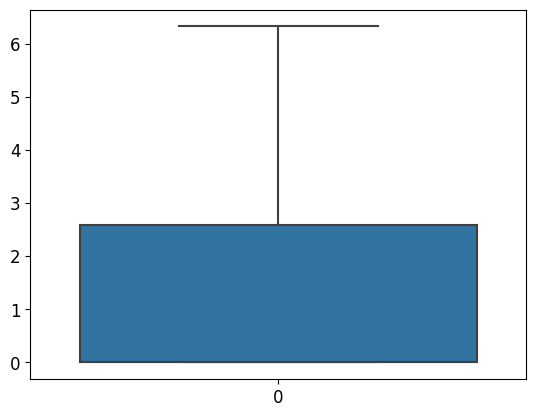

In [13]:
sns.boxplot(np.log(df['sby_need']+ 1))

</br> Application of the log transform has normalized the distribution of our target variables when observed from the graph and has also reduced the impact of extreme outliers to some extent.</br></br>
 Examining how the other continuous variables are distributed. </br></br>


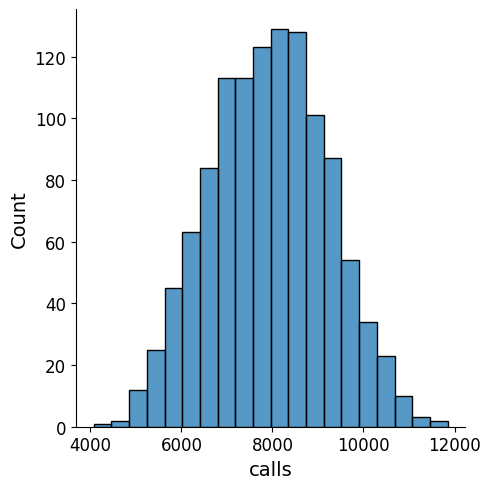

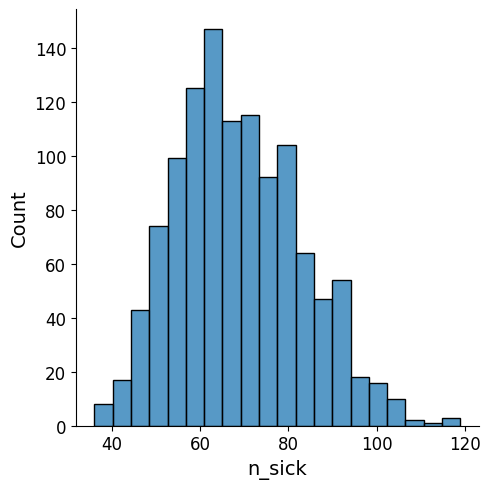

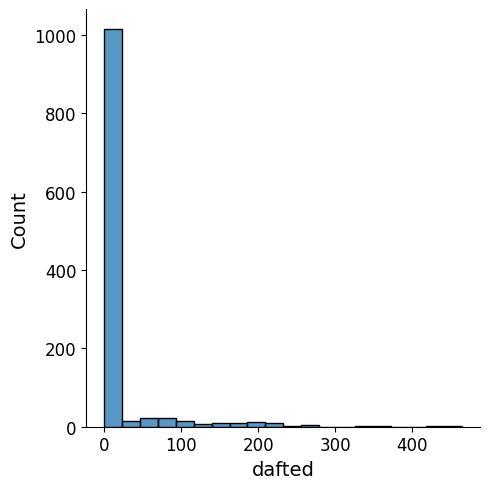

In [14]:
con_vars = ['calls', 'n_sick', 'dafted'] # Get continuous variables
for var in con_vars:
# plot histogram to show the distributions of the continuous variables
    sns.displot(df[var], bins=20)

</br>
From the distribution, n_sicks and call values are normally distributed as observed. A study of dafted distribution shows calculations involving the target variable. If there will be a need to include this variable in future analysis, log transformation will be applied to the column. </br></br>

Investigating the relationships between the continuous variables and the target. </br></br>


[Text(0.5, 1.0, 'Relationship between number of emergencies calls received and the number of standby drivers activated')]

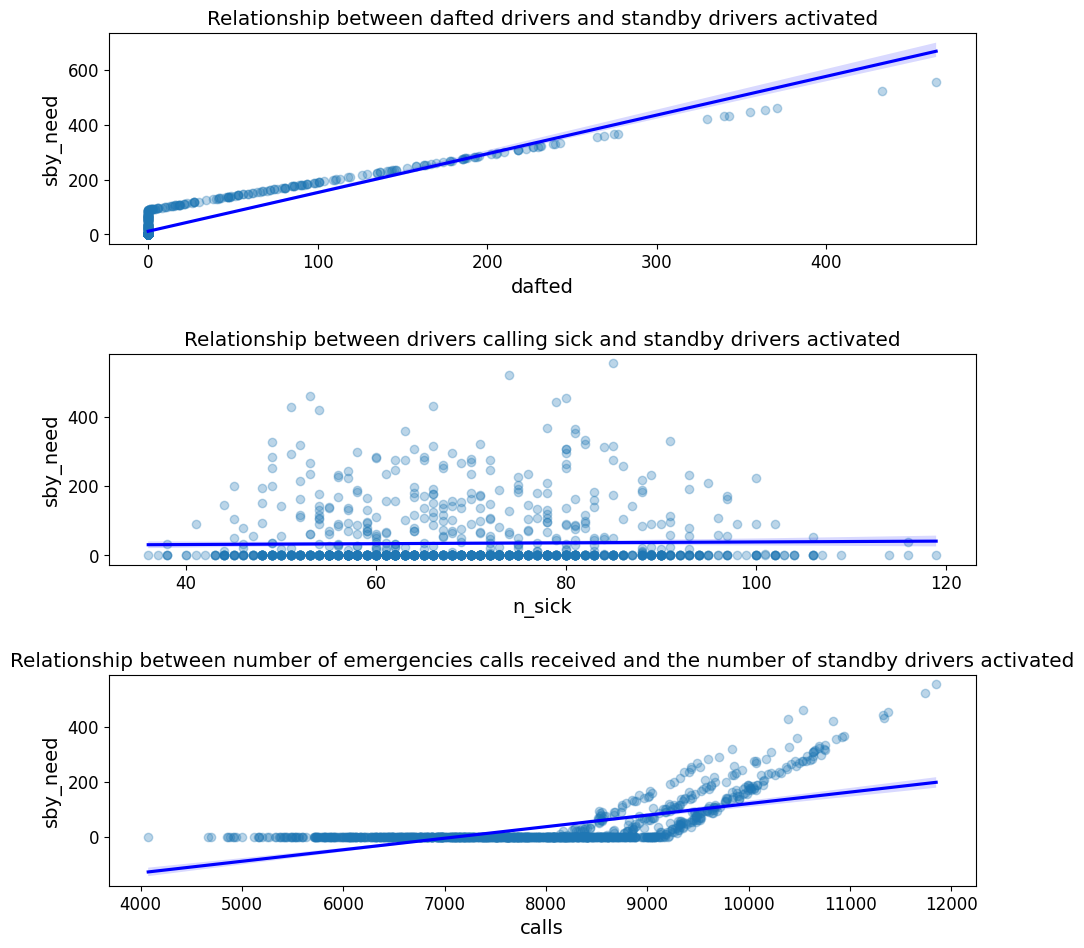

In [15]:
mpl.rc('font', size=12)
figure, axes = plt.subplots(nrows=3)
plt.tight_layout()
figure.set_size_inches(10, 10)
sns.regplot(x='dafted', y='sby_need', data=df, ax=axes[0], scatter_kws={
                'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x='n_sick', y='sby_need', data=df, ax=axes[1], scatter_kws={
                'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x='calls', y='sby_need', data=df, ax=axes[2], scatter_kws={
                'alpha': 0.3}, line_kws={'color': 'blue'})
axes[0].set(title='Relationship between dafted drivers and standby drivers activated')
axes[1].set(title='Relationship between drivers calling sick and standby drivers activated')
axes[2].set(title='Relationship between number of emergencies calls received and the number of standby drivers activated')

</br>
From the graph is it obvious that the variable dafted is almost entirely related to the target, indicating it is essentially a duplicate of the target variable and therefore will be dropped from the analysis. </br></br>
Examining the average number of standby drivers activated per month, week, year, public holiday, and weekends.</br></br> 


[Text(0.5, 1.0, 'standby drivers by weeks of the year')]

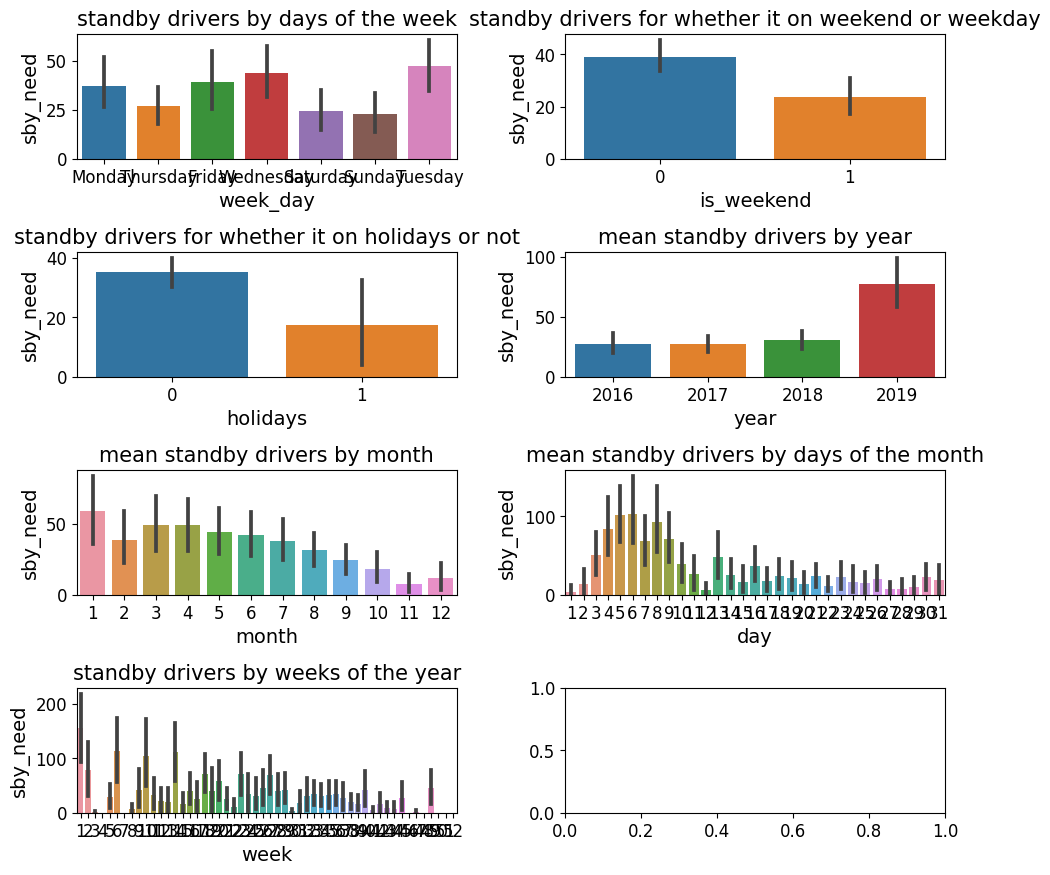

In [16]:
mpl.rc('font', size=10)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=4, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)
sns.barplot(x='week_day', y='sby_need', data=df, ax=axes[0, 0])
sns.barplot(x='is_weekend', y='sby_need', data=df, ax=axes[0, 1])
sns.barplot(x='holidays', y='sby_need', data=df, ax=axes[1, 0])
sns.barplot(x='year', y='sby_need', data=df, ax=axes[1, 1])
sns.barplot(x='month', y='sby_need', data=df, ax=axes[2, 0])
sns.barplot(x='day', y='sby_need', data=df, ax=axes[2, 1])
sns.barplot(x='week', y='sby_need', data=df, ax=axes[3, 0])
axes[0, 0].set(title='standby drivers by days of the week')
axes[0, 1].set(title='standby drivers for whether it on weekend or weekday')
axes[1, 0].set(title='standby drivers for whether it on holidays or not')
axes[1, 1].set(title='mean standby drivers by year')
axes[2, 0].set(title='mean standby drivers by month')
axes[2, 1].set(title='mean standby drivers by days of the month')
axes[3, 0].set(title='standby drivers by weeks of the year')

</br>
Looking at the graph, the average standby drivers activated during the years 2016 to 2018 are similar, compared to 2019 is higher. A close look at the overall dataset reveals that there are only 5 months of entries for 2019, which could explain the disparity. As the year increases, I expect the mean standby to reduce. The histogram indicating monthly distribution affirms the HR department’s assertion of seasonal periodicity. </br>During winter the average daily standby rate (November-December). The need for standby drivers was higher in the spring and summer (March-August) and began to decline in the autumn. While there is an obvious pattern in the weeks of the year chart, there are large jumps for several weeks throughout the year, particularly between spring and autumn. Another interesting discovery is that the average number of standby drivers required in a month appears to be more at the beginning of the month than at the middle and end. It’s also worth noting that the average backup driver required on weekends is lower than on weekdays, but higher on holidays. </br></br>
Decomposing the target variable into three parts: levels, seasonality, trend, and noise.</br></br>
It will generate a decompose_sby_need function that will plot the trend, seasonality, and noise over a 12-month period.</br></br>


<AxesSubplot: xlabel='date', ylabel='sby_need'>

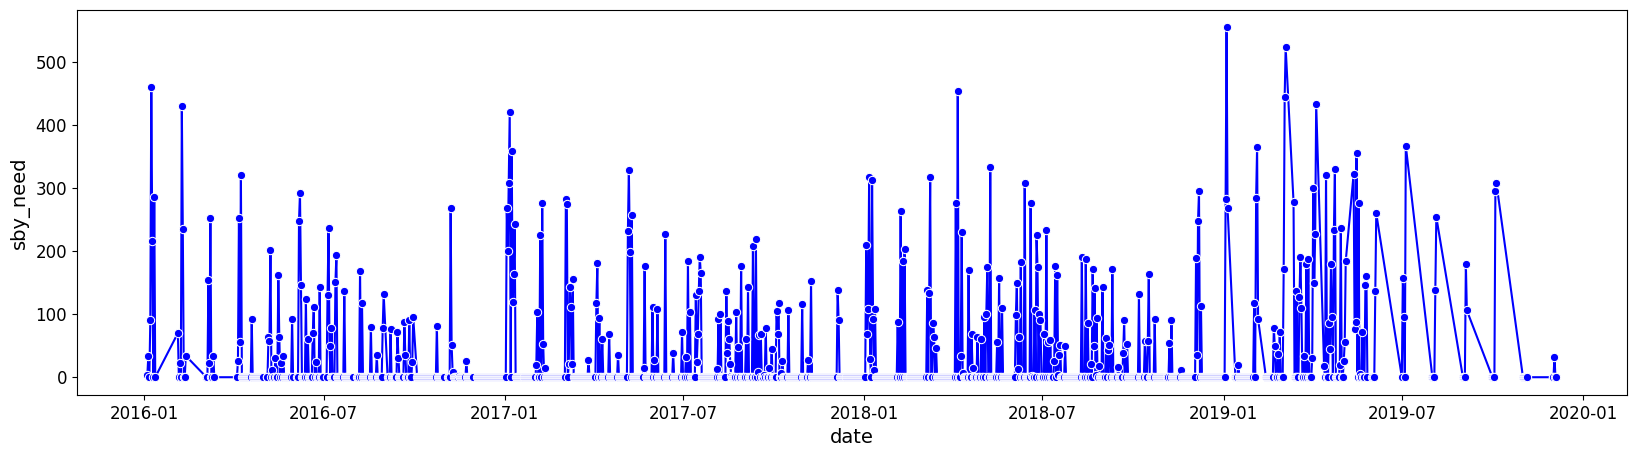

In [17]:
# let plot the daily standby need for the dataset
tmp = df.copy()
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x=tmp.index, y="sby_need", marker='o', color='blue', data=tmp)

</br>The four separate spikes following plateau for each year provide proof of the seasonal rhythm. </br></br>

In [19]:
def decompose_sby_need(df, share_type='sby_need', samples=365, period=12):
    if samples == 'all':
        # decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    # plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16, 8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    # plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()

    # plot the seasonality of the time series. Period = 24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    # plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    plt.show()

In [ ]:
decompose_sby_need(tmp, samples=365, period=12) #

</br>
The trend for our target variable shows a plateau period beginning in August and ending in December, with higher values in the spring and summer, but no specific increasing order pattern. While there is some noise, the seasonality trend demonstrates a consistent, repeating pattern. A regression model that can describe a non-linear relationship and reduce the error between the residues and the mean will be required. I will use extreme gradient boosting, ridge regression, lasso regression, and random forest to model the relationship for this project. </br></br>

With autocorrelation (acf) and partial autocorrelation (pacf) plots, we can see how the values of our target variable are influenced by previous values. </br> 


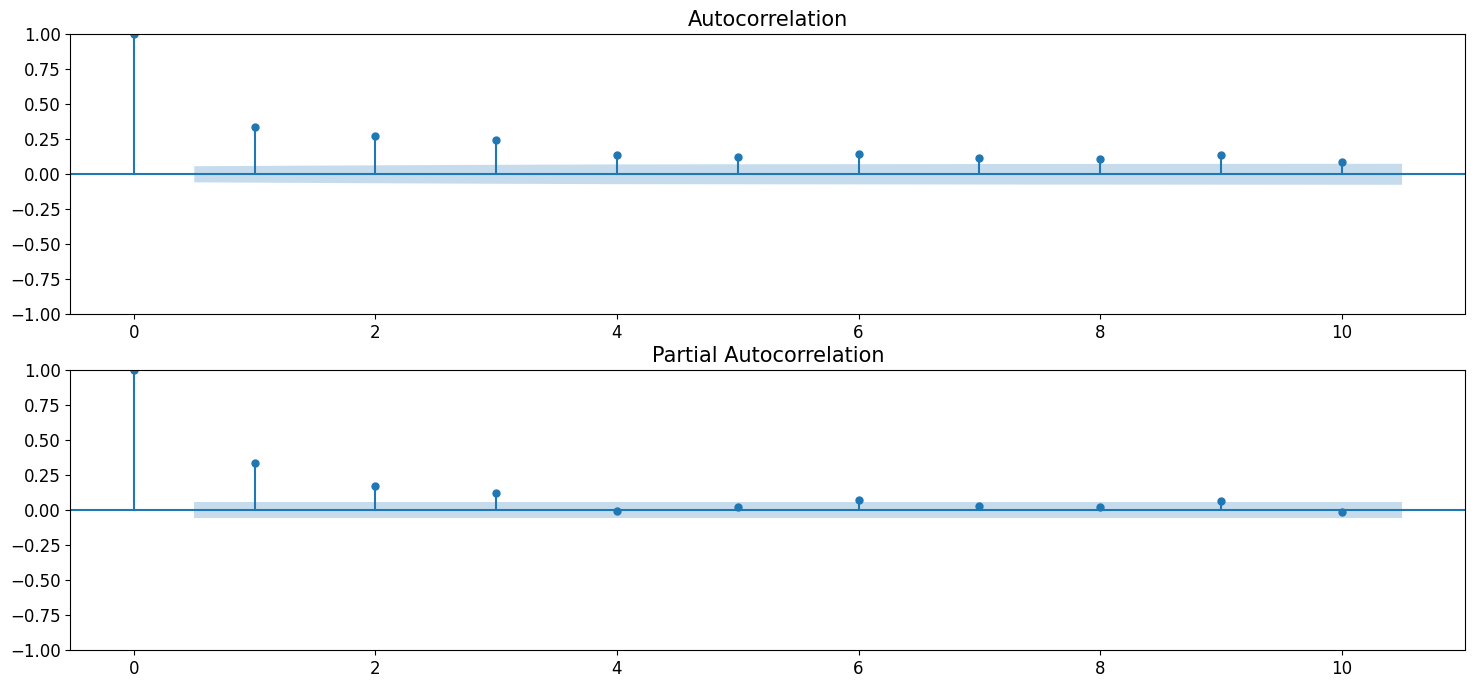

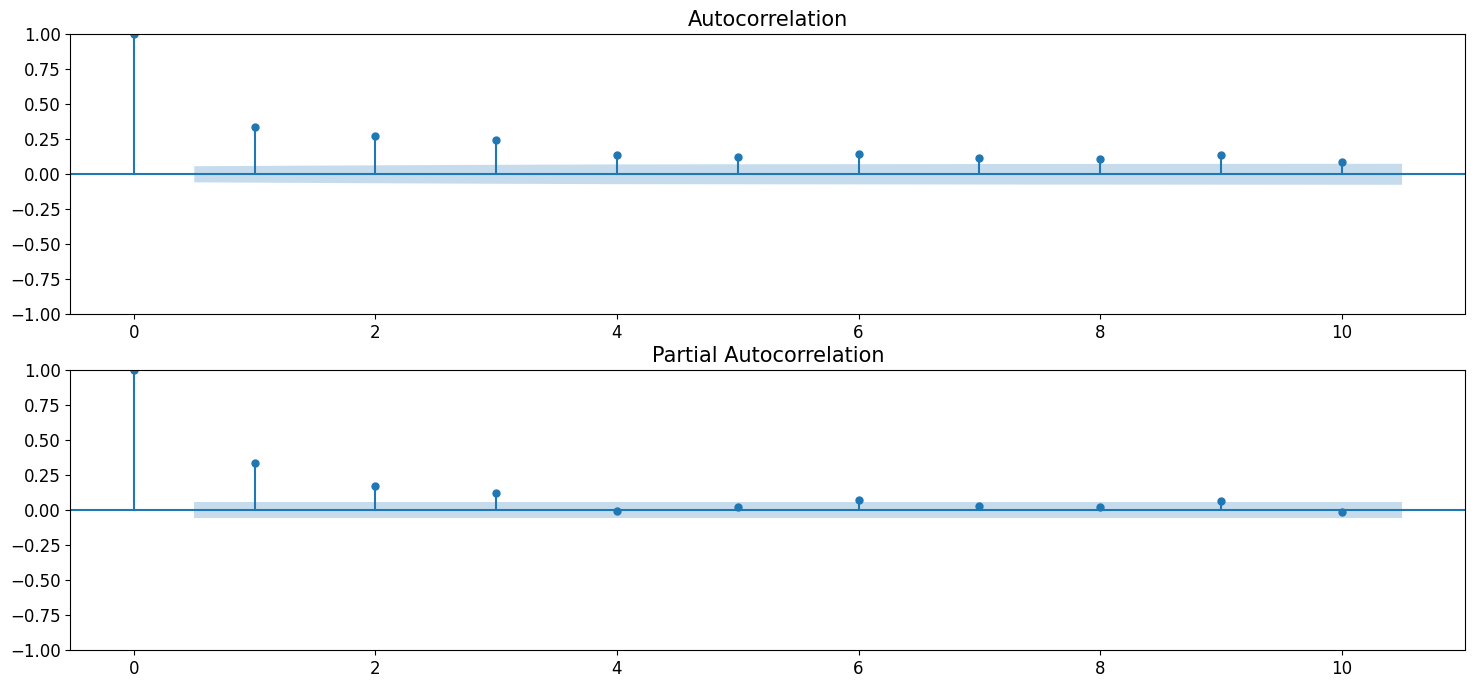

In [20]:
plt.figure(figsize=(18, 8))
plt.subplot(211)
plot_acf(df["sby_need"], lags=10, ax=plt.gca())
plt.subplot(212)
plot_pacf(df["sby_need"], lags=10, ax=plt.gca())

</br>The autocorrelation plot shows a slow decline of values, showing a strong link between them and their preceding values. The partial autocorrelation decays similarly until lag 4. </br></br>

To investigate the correlation between the variables in our dataset, create a correlation matrix. </br></br>


AxesSubplot(0.125,0.11;0.62x0.77)
[Text(0.5, 1.0, 'heatmap of numerical data')]


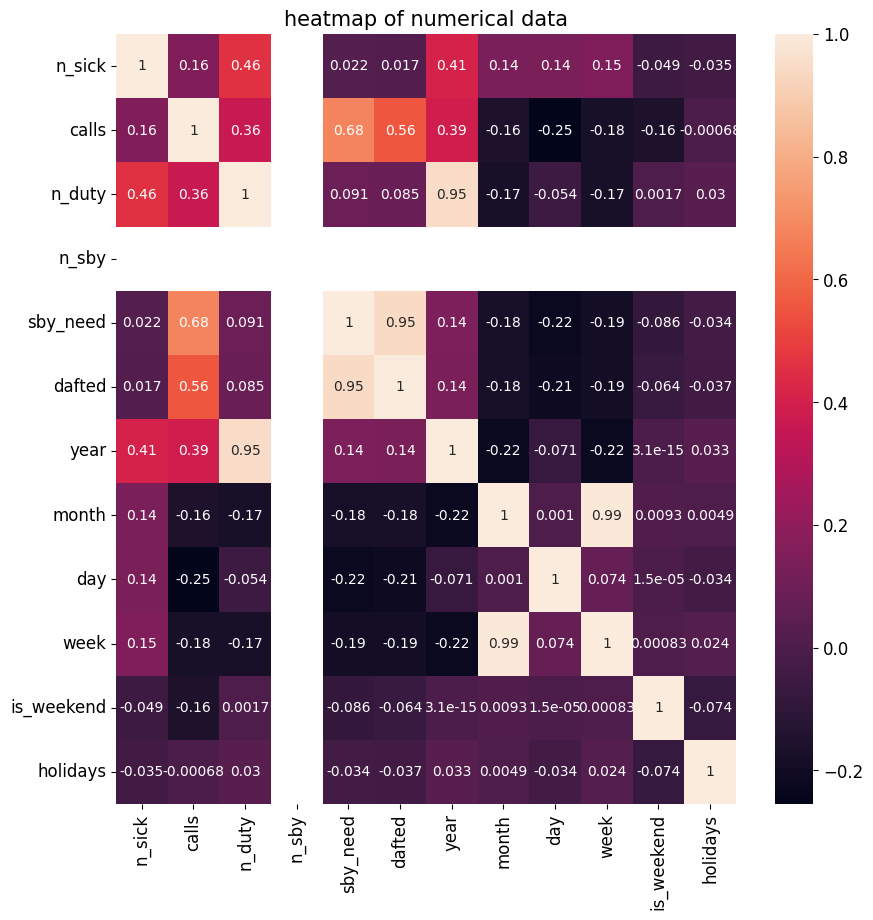

In [21]:
# check the correlation of the columns to each other
corrMat = tmp.corr() # calculate the correlation of the variables with each other
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# plot a heat map and add the correlation value
print(sns.heatmap(corrMat, annot=True))
print(ax.set(title='heatmap of numerical data'))

</br>The variable “n_sby” has only one value, as expected, and hence its correlation cannot be computed due to the standard deviation of 0. Due to that, the variable will be removed. Since it is similar to our target, the column dafted will also be removed. Because several of the independent variables have substantial correlations, one of them will be dropped to avoid the effect of multicollinearity. </br></br> Since the variable “week” has a 0.99 correlation with the month, it will be removed. The column “n_duty” has a 0.95 correlation with the year and shall also be dropped. </br></br> 

###  3.3.     Data Preparation

Data preparation is the process of gathering, combining, structuring and organizing data so it can be used in business intelligence (BI), analytics and data visualization applications. The components of data preparation include data preprocessing, profiling, cleansing, validation and transformation; it often also involves pulling together data from different internal systems and external sources (Business Analytics 2023). Domain expertise is required to assist in the creation of new features that are relevant to the model (Balkansky).

### 3.3.1    Feature Engineering

To begin, some data must be saved in order to test the models. The duty plan for the following month had to be completed by the 15th of the current month, according to the task description. The last month in the dataset is May, with 27 entries. As a result, the data from April 16th to May 27th will be used as the test set, while the rest will be used as the training set. Two new features must be created before the data can be split into test and training sets. The first will be the rolling mean for a seven-day span and a lag feature. These two characteristics are created from the target variables and are useful in determining how a target value is influenced by previous observations. A shift of 4 will be made for the lag variable. The partial correlation coefficient graph shown above is used to guide lag feature engineering.

In [22]:
# Reload the sickness_table.csv dataset and parse the date as a datetime object.
sickness = pd.read_csv("sickness_table.csv", parse_dates=['date'])
# drop the first column
sickness.drop('Unnamed: 0', axis=1, inplace=True)
# preview the data
print(sickness.head(2))

        date  n_sick  calls  n_duty  n_sby  sby_need  dafted
0 2016-01-04      73   8154    1700     90         4       0
1 2016-02-04      64   8526    1700     90        70       0


In [23]:
# create lag4 feature from the target
sickness['lag_4'] = sickness.sby_need.shift(4) # Shift the target4 step
sickness = sickness.dropna() # Drop the rows with null values
# createrolling mean of 7 feature
sickness['rolling_mean'] = sickness.sby_need.rolling(7).mean()
sickness = sickness.dropna() # Drop the rows with null values
print(sickness.head(2))# preview the new addition

         date  n_sick  calls  n_duty  n_sby  sby_need  dafted  lag_4  \
10 2016-11-04      50   6822    1700     90         0       0    0.0   
11 2016-12-04      49   6060    1700     90         0       0    0.0   

    rolling_mean  
10           0.0  
11           0.0  


Train dates: 2016-01-05 00:00:00 --- 2019-12-04 00:00:00 (n=1100)
Test dates: 2019-01-05 00:00:00 --- 2019-12-05 00:00:00 (n=42)


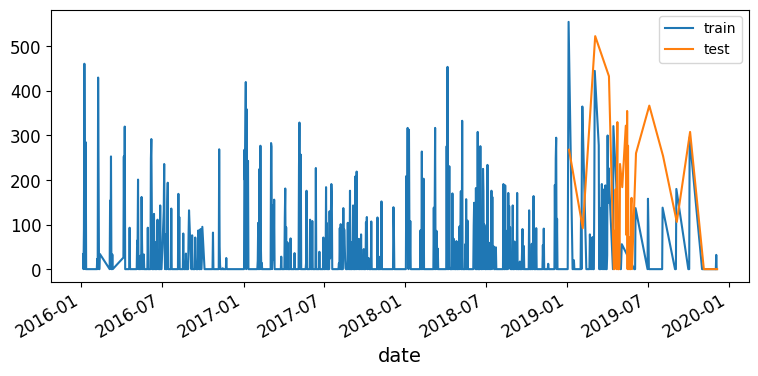

In [24]:
# Make the last 42days a test set and the remaining days a trainset.
# make the date the index
sickness = sickness.set_index(sickness.date)
X = sickness.drop('sby_need', axis=1) # get the independent variables
y = sickness.sby_need # get the target variable
step_days = 42 # Number of days 
X_train, X_test = X.iloc[:-step_days, :],X.iloc[-step_days:, :]
y_train, y_test = y.iloc[:-step_days], y.iloc[-step_days:]
# check the starting and ending date and the length of the train and test sets.
print(f"Train dates: {X_train.index.min()} --- {X_train.index.max()} (n={len(X_train)})")
print(f"Test dates: {X_test.index.min()} --- {X_test.index.max()} (n={len(X_test)})")
# Plot the train and test targets
fig, ax = plt.subplots(figsize=(9, 4))
y_train.plot(ax=ax, label='train') # plot train data target
y_test.plot(ax=ax, label='test') # plot test data target
ax.legend()

</br> Apply a natural logarithm transformation to the target. This transformation will improve the distribution of the target and remove the outliers. </br></br>

In [25]:
# log transform the target
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

</br> Engineer features such as the days of the week, month, year, holidays, days of the month from the date column. </br></br>

In [26]:
# Create function to get German Pubic Holidays
def get_holidays():
    "'The function outputs all public holidays in the Federal Republic of Germany from 2016 to 2020."
    # Import the required libraries
    import holidays
    from workalendar.europe import Germany
    holiday_list = [] # list for all the dates of public holidays
    # Get list of public holidays in Germany
    for i, v in holidays.Germany(years=[2016, 2017, 2018, 2019]).items():
        holiday_list.append(i) # append only the date and not the name
    return holiday_list

In [27]:
# Create a function to extract date features
def date_features(df, holiday_list):
    '''Perform date operation on pandas dataframe and extract date features'''
    df['year'] = df['date'].dt.year.astype(str) # Get year from the date
    df['month'] = df['date'].dt.month.astype(str) # get months from the year
    df['day'] = df['date'].dt.day.astype(str) # Get days of the month
    df['week'] = df['date'].dt.week.astype(str) # Get weeks of the year
    df['week_day'] = df['date'].dt.day_name() # Get the days of the week
    df['is_weekend'] = df['week_day'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0).astype(str) # specify if day isweekend or not
    df['holidays'] = df['date'].apply(lambda x: 1 if x in holiday_list else 0).astype(str)
    df = df.set_index(df.date) # set the date column as index
    # drop the date colum
    df.drop('date', axis=1, inplace=True) # drop the date column
    return df # Return a new dataframe with the newly engineered features.

In [28]:
# get holidays
holidays = get_holidays()
# get date features for Training set
X_train = date_features(X_train, holidays)
print(X_train.head(2))

            n_sick  calls  n_duty  n_sby  dafted  lag_4  rolling_mean  year  \
date                                                                          
2016-11-04      50   6822    1700     90       0    0.0           0.0  2016   
2016-12-04      49   6060    1700     90       0    0.0           0.0  2016   

           month day week week_day is_weekend holidays  
date                                                    
2016-11-04    11   4   44   Friday          0        0  
2016-12-04    12   4   48   Sunday          1        0  


In [29]:
# get date features for Test set
X_test = date_features(X_test, holidays)
print(X_test.head(2))

            n_sick  calls  n_duty  n_sby  dafted  lag_4  rolling_mean  year  \
date                                                                          
2019-04-16      71   8286    1900     90       0    0.0     90.714286  2019   
2019-04-17      73   9072    1900     90       0   18.0     48.428571  2019   

           month day week   week_day is_weekend holidays  
date                                                      
2019-04-16     4  16   16    Tuesday          0        0  
2019-04-17     4  17   16  Wednesday          0        0  


</br> Because rolling mean and lag 4 have comparable distributions to the target from which they were derived, they should be logarithmically transformed. </br>

In [30]:
for var in ["lag_4", "rolling_mean"]:
    X_train[var] = np.log(X_train[var]+1) # transform for the training set
    X_test[var] = np.log(X_test[var] + 1) # transform for the test set

In [ ]:
# print(X_test.tail(2))

</br> A categorical variable is a discrete variable that captures qualitative outcomes by placing observations into fixed groups (or levels). The groups are mutually exclusive, which means that each individual fits into only one category (Eric 2021). Although the data set may not appear categorical, but careful examination reveals that some features, such as n_sby, n_duty, day, month, and others, have a fixed number of categories. There is no scale valuation as the year 2019 is not valued higher than 2018. OneHot encoding will help transform all the categories of a particular column into 0s and 1s, giving equal value.

The columns, week, n_duty and n_sby, though categorical, will not be transformed as they will be dropped. These columns were found to be redundant copies of other columns during the data exploration phase. Again, to ensure we have the same number of columns in both the training and the test sets, we will need to use an encoder to learn from the training set and use it to transform the test sets. In other words, the year column, for instance, in our training set has four categories, but only one appears in the test set. only calling pd.get_dummies will result in fewer columns in the test set than in the training set. For this project, I will use the OneHotEncoder from the open source package feature_engine. </br>

In [31]:
# import the OneHot Encoder class from feature_engine
from feature_engine.encoding import OneHotEncoder
CATEGORICAL_VARS = ['month', 'week_day', 'day', 'year','is_weekend', 'holidays'] # columns to transform
enc = OneHotEncoder(variables=CATEGORICAL_VARS) # instance of the class
enc.fit(X_train) # train the encoder

OneHotEncoder(variables=['month', 'week_day', 'day', 'year', 'is_weekend',
                         'holidays'])

In [32]:
# transform the train variables
X_train = enc.transform(X_train)
print(X_train.head(2))

            n_sick  calls  n_duty  n_sby  dafted  lag_4  rolling_mean week  \
date                                                                         
2016-11-04      50   6822    1700     90       0    0.0           0.0   44   
2016-12-04      49   6060    1700     90       0    0.0           0.0   48   

            month_11  month_12  month_4  month_1  month_2  month_3  month_5  \
date                                                                          
2016-11-04         1         0        0        0        0        0        0   
2016-12-04         0         1        0        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  week_day_Friday  \
date                                                                        
2016-11-04        0        0        0        0         0                1   
2016-12-04        0        0        0        0         0                0   

            week_day_Sunday  week_day_Wednesday  week_day_Thu

In [33]:
# transformtheX_test
X_test = enc.transform(X_test)
print(X_test.head(2))

            n_sick  calls  n_duty  n_sby  dafted     lag_4  rolling_mean week  \
date                                                                            
2019-04-16      71   8286    1900     90       0  0.000000      4.518678   16   
2019-04-17      73   9072    1900     90       0  2.944439      3.900529   16   

            month_11  month_12  month_4  month_1  month_2  month_3  month_5  \
date                                                                          
2019-04-16         0         0        1        0        0        0        0   
2019-04-17         0         0        1        0        0        0        0   

            month_6  month_7  month_8  month_9  month_10  week_day_Friday  \
date                                                                        
2019-04-16        0        0        0        0         0                0   
2019-04-17        0        0        0        0         0                0   

            week_day_Sunday  week_day_Wednesday  

In [34]:
# check to see if they have equal shape
print(f'X_train shape: {X_train.shape}')
print('='*25)
print(f'X_test shape: {X_test.shape}')

X_train shape: (1100, 66)
X_test shape: (42, 66)


In [35]:
# check for missing values
print(X_train.isnull().sum())
print('='*20)
print(X_test.isnull().sum())

n_sick          0
calls           0
n_duty          0
n_sby           0
dafted          0
               ..
year_2019       0
is_weekend_0    0
is_weekend_1    0
holidays_0      0
holidays_1      0
Length: 66, dtype: int64
n_sick          0
calls           0
n_duty          0
n_sby           0
dafted          0
               ..
year_2019       0
is_weekend_0    0
is_weekend_1    0
holidays_0      0
holidays_1      0
Length: 66, dtype: int64


In [36]:
# save the X_train, y_train, X_test, y_test for feature selection
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

### 3.3.2. Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model (Brownlee 2019). 
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

The purpose of feature selection is to exclude predictors that aren’t useful or redundant from the model. Statistical-based feature selection methods involve using statistics to assess the relationship between each input variable and the target variable, and then selecting the input variables that have the strongest relationship with the target variable (Brownlee 2019). The features of this model will be chosen depending on the knowledge gathered during the data exploration phase. Variables such as n duty, n sby, and dafted, and week will be removed. The week column was shown to be considerably correlated with the month with a correlation of 0.99, making the two redundant copies of each other. 

The variable n duty was also highly associated with the year variable, with a correlation of 0.95. The n_sby variable has only one (1) value of 90 in the entire dataset and has no relation to the target. The column’s addition will increase the computational cost, but it will be of little use in training, thus it will be removed.Finally, it was determined that the target was involved in a computation in the column dafted. Although it has a strong association with the target, it is identical to our target and will not be useful in forecasting it. As a result, it will be dropped


In [37]:
# load the X_train and X_test sets
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')
# print(X_train.head())

In [38]:
# load the target(remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')
# print(y_train.head())

In [39]:
col_to_drop = ['week', 'n_duty', 'n_sby', 'dafted']
# Remove from the training set
X_train.drop(col_to_drop, axis=1, inplace=True)
# #Remove from the test set
X_test.drop(col_to_drop, axis=1, inplace=True)

Dropping features week, n_sby n_duty, and dafted

In [40]:
# check the shapes again
# check to see if they have equal shape
print(f'X_train shape: {X_train.shape}')
print('='*20)
print(f'X_test shape: {X_test.shape}')

X_train shape: (1100, 62)
X_test shape: (42, 62)


In [41]:
# get the selected features
selected_feats = X_train.columns
# print(selected_feats)

In [42]:
# save seleceted features
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)

## 3.4. Modeling

Modeling is the analytical core of the data mining process. This is where the selection and use of modeling techniques take place (Felgentreff). A range of modeling approaches are used to create and evaluate various models. Data scientists typically test numerous models with default parameters, then fine-tune the parameters or return to the data preparation process to make the changes that their favorite model requires (IBM SPSS Modeler CRISP-DM Guide). 

There are four processes in this phase: selecting a modeling technique, establishing a test design, building the model, and evaluating the model. To estimate the number of standby drivers needed each day, a regression model will be developed. To estimate the number of standby drivers required each day, a regression model will be developed. A baseline regression model that will be used as a comparison point for four pre- dictive models: ridge regression, lasso regression, random forest regression, and extreme gradient boosting regression. 

Linear regression

In [43]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# save the base line model
joblib.dump(linear_reg_model, 'linear_regression.joblib')

['linear_regression.joblib']

Predictive models

Lassso model


In [45]:
lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter': [3000], 'alpha': lasso_alpha}
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,param_grid=lasso_params,scoring='neg_mean_squared_error',cv=5)
gridsearch_lasso_model.fit(X_train, y_train)
print('Optimal hyperparameters:', gridsearch_lasso_model.best_params_)


Optimal hyperparameters: {'alpha': 0.01, 'max_iter': 3000}


In [46]:
# save best lasso model
joblib.dump(gridsearch_lasso_model.best_estimator_, 'lasso_regression.joblib')

['lasso_regression.joblib']

Rigde model

In [47]:
# create a model
ridge_model = Ridge()
# define hyperameters
ridge_params = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# create a grid search object
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,param_grid=ridge_params,scoring='neg_mean_squared_error',cv=5)

In [48]:
gridsearch_ridge_model.fit(X_train, y_train) # train the model
print('Optimal hyperparameters:', gridsearch_ridge_model.best_params_)

Optimal hyperparameters: {'alpha': 30, 'max_iter': 3000}


In [49]:
# save best Ridge model
joblib.dump(gridsearch_ridge_model.best_estimator_, 'ridge_regression.joblib')

['ridge_regression.joblib']

Random forest model

In [50]:
# Create a model
randomforest_model = RandomForestRegressor()
# Create grid search object
# random_state-random seed value,n_estimators-number of decision trees
rf_params = {'random_state': [42], 'n_estimators': [100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
param_grid=rf_params,scoring='neg_mean_squared_error',cv=5)

In [51]:
gridsearch_random_forest_model.fit(X_train, y_train) # train the model
print('Optimal hyperparameters: ', gridsearch_random_forest_model.best_params_)

Optimal hyperparameters:  {'n_estimators': 100, 'random_state': 42}


In [52]:
# save best Random forest model
joblib.dump(gridsearch_random_forest_model.best_estimator_, 'random_forest.joblib')

['random_forest.joblib']

XGBoosts

In [53]:
# Create grid search object
param = {
    'objective': 'reg:squarederror',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'gamma': 0,
    'max_depth': 5,
    'min_child_weight': 1,
    'colsample_bytree': 0.5,
    'subsample': 0.8,
    'verbose': 1,
    'reg_alpha': 0
    }

param_test1 = {
'max_depth': [7, 13, 15],
'reg_alpha': [0.1, 1, 10, 100],
'learning_rate': [0.05, 0.1],
}
# create a model
gridsearch_xgboost_model = GridSearchCV(xgb.XGBRegressor(objective=param['objective'],n_estimators=param['n_estimators'], learning_rate=param[
'learning_rate'],gamma=param['gamma'],colsample_bytree=param['colsample_bytree'], subsample=param['subsample'],reg_alpha=param['reg_alpha']
),param_grid=param_test1,scoring='neg_mean_squared_error', cv=5)



In [54]:
gridsearch_xgboost_model.fit(X_train, y_train) # train the model
print('Optimal hyperparameters: ', gridsearch_xgboost_model.best_params_)

Optimal hyperparameters:  {'learning_rate': 0.05, 'max_depth': 7, 'reg_alpha': 1}


In [55]:
# save best XGBoosts model
joblib.dump(gridsearch_xgboost_model.best_estimator_, 'xgboosts.joblib')

['xgboosts.joblib']

### 3.5 Model Evaluation 
At this point, you've completed most of your data mining project. You've also determined, in the Modeling phase, that the models built are technically correct and effective according to the data mining success criteria that you defined earlier (IBM SPSS Modeler CRISP-DM Guide).
A regression model’s performance is evaluated using a variety of metrics. There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are: R Square/Adjusted R Square, Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) (Brownlee 2021).

#### R Square/Adjusted R Square 
R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square. (Wu 2020)
R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value. (Wu 2020)

##### Mean Squared Error / Root Mean Squared Error
Mean Squared Error, or MSE for short, it is a popular error metric for evaluating regression problems. It is also an important loss function for algorithms fit or optimized using the least squares framing of a regression problem. Here “least squares” refers to minimizing the mean squared error between predictions and expected values. The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset. (Brownlee 2019)

The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.
The square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.
It may be common to use MSE loss to train a regression predictive model, and to use RMSE to evaluate and report its performance. (Brownlee 2019)

RMSE = √(1/n  ∑_(n-1)^n▒〖(y〗 i – y ̂i )^2 ) 

Where  𝑛 = number of data points, yi = observed values and y ̂i = predited values.

##### Mean Absolute Error
Mean Absolute Error, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.
The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. The MAE score is calculated as the average of the absolute error values. Absolute or abs() is a mathematical function that simply makes a number positive. Therefore, the difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE. (Brownlee 2019)

 
load the models


In [56]:
# load baseline regression model
baseline_model = joblib.load('linear_regression.joblib')
# load the lasso model
lasso_model = joblib.load('lasso_regression.joblib')
# load the ridge model
ridge_model = joblib.load('ridge_regression.joblib')
# load the random forest model
random_forest_model = joblib.load('random_forest.joblib')
# load the XGBoosts model
xgb_model = joblib.load('xgboosts.joblib')


I will assess the model’s performance on both the train and test sets. Overfitting occurs when a model performs well on a training set but not on a test set, causing the model to fail to generalize well with unknown data.


In [57]:
# Evaluate baseline model
# make predictions for trainset
print('Baseline Model')
print('='*20)
print('Baseline predictionfortrainset')
print()
pred = baseline_model.predict(X_train)
# determine mse,rmse and r2
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1, squared=False))))
print('train r2: {}'.format(r2_score(np.exp(y_train) - 1, np.exp(pred) - 1)))
print()
print()
# make predictions for testset
print('Baseline predictionfortestset')
print()
pred1 = baseline_model.predict(X_test)
# determine mse,rmse and r2
print('test mse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1))))
print('test rmse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1, squared=False))))
print('test r2: {}'.format(
r2_score(np.exp(y_test) - 1, np.exp(pred1) - 1)))
print()
print('='*30)
print()

# Evaluate Ridge model
# make predictions for trainset
print('Ridge Model')
print('-'*20)
print('Ridge predictionfortrainset')
print()
pred = ridge_model.predict(X_train)
# determine mse,rmse and r2
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1, squared=False))))
print('train r2: {}'.format(r2_score(np.exp(y_train) - 1, np.exp(pred) - 1)))
print()
print()
# make predictions for testset
print('Ridge predictionfortestset')
print()
pred1 = ridge_model.predict(X_test)

# determine mse,rmse and r2
print('test mse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1))))
print('test rmse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1, squared=False))))
print('test r2: {}'.format(
r2_score(np.exp(y_test) - 1, np.exp(pred1) - 1)))
print()
print('='*30)

# Evaluate lasso model
# make predictions for trainset
print('Lasso Model')
print('-'*20)
print('Lasso predictionfortrainset')
print()
pred = lasso_model.predict(X_train)
# determine mse,rmse and r2
print('train mse: {}'.format(int(
mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1))))
print('train rmse: {}'.format(int(
mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1, squared=False))))
print('train r2: {}'.format(
r2_score(np.exp(y_train) - 1, np.exp(pred) - 1)))
print()
print()
# make predictions for testset
print('Lasso predictionfortestset')
print()
pred1 = lasso_model.predict(X_test)
# determine mse,rmse and r2
print('test mse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1))))
print('test rmse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1, squared=False))))
print('test r2: {}'.format(
r2_score(np.exp(y_test) - 1, np.exp(pred1) - 1)))
print()
print('='*30)
print()

# Evaluate Random forest model
# make predictions for trainset
print('Random ForestModel')
print('-'*20)
print('Random forestpredictionfortrainset')
print()
pred = random_forest_model.predict(X_train)
# determine mse,rmse and r2
print('train mse: {}'.format(int(
mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1))))
print('train rmse: {}'.format(int(
mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1, squared=False))))
print('train r2: {}'.format(
r2_score(np.exp(y_train) - 1, np.exp(pred) - 1)))
print()
print()
# make predictions for testset
print('Random Forestpredictionfortestset')
print()
pred1 = random_forest_model.predict(X_test)
# determine mse,rmse and r2
print('test mse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1))))
print('test rmse: {}'.format(int(
mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1, squared=False))))
print('test r2: {}'.format(
r2_score(np.exp(y_test) - 1, np.exp(pred1) - 1)))
print()
print('='*30)

# Evaluate xgboosts model
# make predictions for trainset
print('XGBoosts Model')
print('-'*20)
print('XGBoosts predictionfortrainset')
print()
pred = xgb_model.predict(X_train)

# determine mse,rmse and r2
print('train mse: {}'.format(int(
mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1))))
print('train rmse: {}'.format(int(
mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1, squared=False))))
print('train r2: {}'.format(
r2_score(np.exp(y_train) - 1, np.exp(pred) - 1)))
print()
print()

# make predictions for testset
print('XGBoosts predictionfortestset')
print()
pred1 = xgb_model.predict(X_test)
# determine mse,rmse and r2
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1))))
print('test rmse: {}'.format(int(mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1, squared=False))))
print('test r2: {}'.format(r2_score(np.exp(y_test) - 1, np.exp(pred1) - 1)))
print()
print('='*30)

Baseline Model
Baseline predictionfortrainset

train mse: 3021
train rmse: 54
train r2: 0.4486004479659925


Baseline predictionfortestset

test mse: 23128
test rmse: 152
test r2: -0.12335338246232497


Ridge Model
--------------------
Ridge predictionfortrainset

train mse: 3231
train rmse: 56
train r2: 0.41035698116970465


Ridge predictionfortestset

test mse: 21095
test rmse: 145
test r2: -0.024620550103081174

Lasso Model
--------------------
Lasso predictionfortrainset

train mse: 3279
train rmse: 57
train r2: 0.40158952768837


Lasso predictionfortestset

test mse: 20551
test rmse: 143
test r2: 0.0018091066255694344


Random ForestModel
--------------------
Random forestpredictionfortrainset

train mse: 25
train rmse: 5
train r2: 0.9953267917848448


Random Forestpredictionfortestset

test mse: 276
test rmse: 16
test r2: 0.9865814159737523

XGBoosts Model
--------------------
XGBoosts predictionfortrainset

train mse: 30
train rmse: 5
train r2: 0.9945028972337041


XGBoosts pred


In general, the prediction models outperformed our baseline linear regression model. Random forest, on the other hand, outperformed the others on both the training and test sets. On the test set, the random forest model generalizes well with unknown data, with an RMSE of 14 and a 𝑅Sqaure of 0.98. 

While the XGBoosts model beat the random forest on the training set, it degraded on unseen data, indicating that the XGBoosts model had been overfit to the training data. Both lasso and ridge regression outperformed the baseline model, although neither came close to the random forest model’s performance. As a result, the random forest model will be further processed for deployment and utilized to forecast the Berlin Red Cross Rescue Service’s standby duty plan of drivers.

Appendix B contains the pipeline that will be deployed to production.


In [58]:
pred = random_forest_model.predict(X_test) # get predictions
pred1 = pd.Series(np.exp(pred) - 1) # reverse the log transformation
X = np.exp(y_test) - 1 # reverse the log transformation

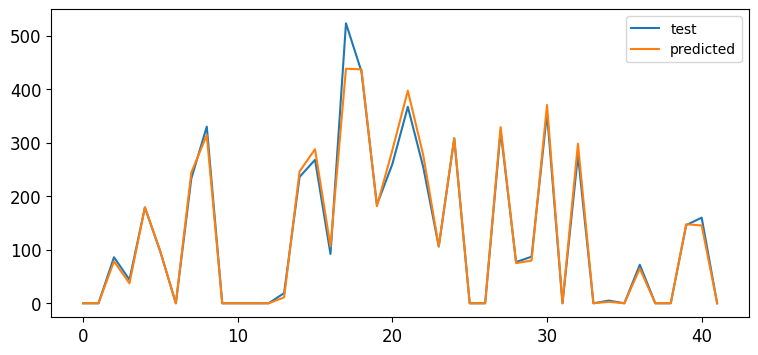

In [59]:
# Plot the test and prediction targets
fig, ax = plt.subplots(figsize=(9, 4))
X['sby_need'].plot(ax=ax, label='test') # plot testset
pred1.plot(ax=ax, label='predicted') # plot predicted target
ax.legend()

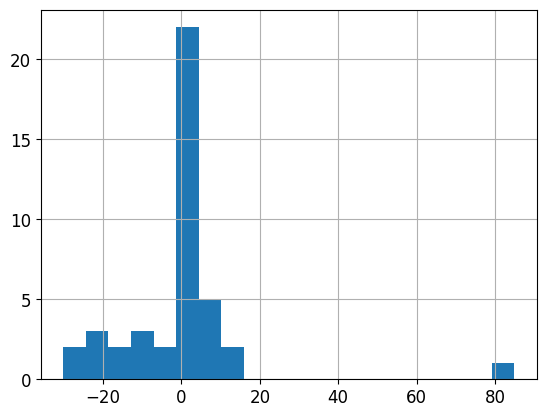

In [60]:
# let's evaluate the distribution of the errors:
# they should be fairly normally distributed
error = X['sby_need'] - pred1
error.hist(bins=20)
plt.show()


The error distribution approaches a gaussian distribution in appearance.This shows that our model is also performing well. 

Evaluate the features’ importance for the random forest model


Text(0.5, 1.0, 'Feature Importance')

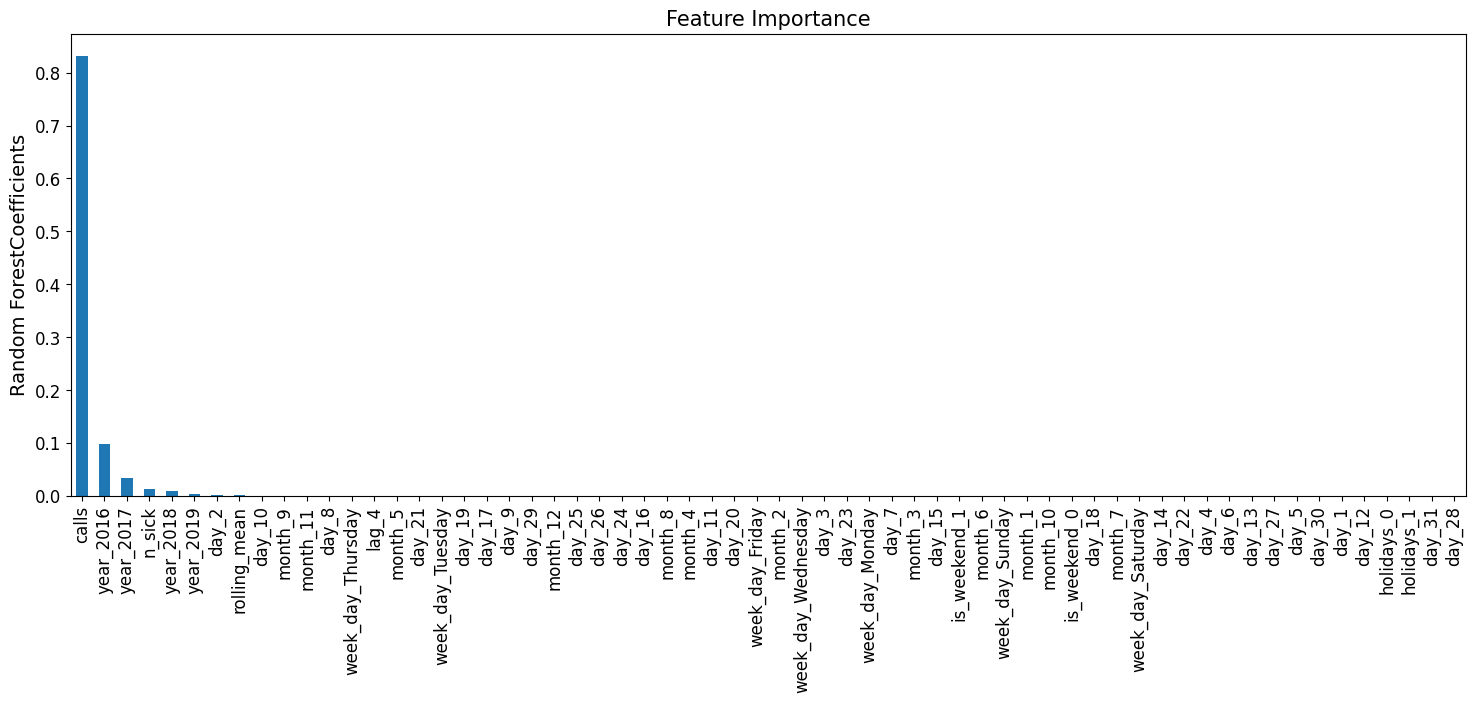

In [61]:
# Finally, let's look at the feature importance
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()
importance = pd.Series(random_forest_model.feature_importances_)
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18, 6))
plt.ylabel('Random ForestCoefficients')
plt.title('Feature Importance')


The amount of emergency calls received in a day is the most predictive feature for daily standby drivers, according to the future importance graph. According to the feature graph, if the features calls, year, and n sick are solely utilized for training the model, the results will be comparable, as most of the features engineered were not involved in the tree splitting decision. 

This could explain why XGBoosts overfitted to the training data in order to learn more features for the tree decision, resulting in fantastic performance on the train set but poor generalization on the test set.While the above model has good predictive accuracy for anticipating drivers’ daily standby, I feel that other factors, like as the weather of the day, may alter such models.



### 3.6 Deployment
Deployment is the method by which you integrate a machine learning model into an existing production environment to make practical business decisions based on data (DataRobot AI Platform 2023). The whole pipeline is deployed for data science applications  𝐴𝑝𝑝𝑒𝑛𝑑𝑖𝑥 𝐵 contains the pipeline of the random forest model that can be deployed to production. After you have a set of models that function, you may operationalize them using additional apps. Depending on the business requirements, predictions are made in real time or in batches. Use an open API to expose models for deployment. The model can be used in a variety of ways, including online websites, spreadsheets, dashboards, line-of-business tools, and back-end systems. Create a detailed plan for deploying and integrating each deployable model with your systems. Any technical details, such as the database requirements for model output, should be documented. The organization’s system, for example, can mandate that modeling output be supplied in tab-delimited format. Make a plan to get the information to the people who will make the final decisions for each one. Is there anything else worth mentioning in terms of deployment tactics for both types of outcomes? Think about how you will keep track of the rollout. How will a deployed model, for example, be updated? Make a decision when the model is no longer appropriate. 

Prepare a list of any deployment concerns and make backup preparations. Decision-makers, for example, may want more information about the modeling results and technical details. Deployment is more akin to software engineering than data science. You must first decide how you will deploy your model. For example, our random forest model will be deployed to Horeku, a platform as a service.The model’s production code, API design, configuration files, test design, Dockerfile, and all other files needed for deployment will be versioned in a source repository like Git. It’s critical to have both a version.txt file for the code version and a requirement.txt file for all the software prerequisites for your model in the same repositories. Once the code is integrated into the source repositories, CI/CD technologies like circleci monitor the source repositories for changes in source and code, test the code, and build a docker image that can be released to public or private repository such as docker hub or Horeku repositories.

The Docker image is pulled from the repository and deployed to production right away. Instead of standby drivers, I believe the task can be properly defined to estimate the number of daily drivers required. To clarify, on more than one occasion, the daily standby is 0. In my opinion, there are times when the number of drivers required on a daily basis is less than the number of drivers on duty. Forecasting the number of drivers needed daily can be advantageous to the company. By completing a multi-forecasting task, any forecasting task can be improved. To be more effective in forecasting future standby drivers, I believe that a more complicated model than the one above should be constructed by combining the output of several algorithms that estimate the number of emergency calls received and everyday drivers’ calling sick.







### 4. Conclusion

Time series data is a standard data format for capturing and documenting activity in a variety of applications. The progression of a time series over a certain future time period is the subject of forecasting. Machine learning techniques are becoming the gold standard for time series forecasting. A random forest model was employed in this project to help the Berlin Red Cross rescue service’s HR department find a more efficient way to schedule the number of backup rescue drivers needed on a daily basis. 
The project’s dataset was collected from the HR department and includes information for the rescue drivers’ schedule from April 2016 to May 2019, including columns such as the number of emergency calls received, the number of drivers on duty calling sick, and the number of drivers on duty daily. 

Exploring the data reveals some crucial discoveries that aided in model selection. Because the target was continuous, a regression model was necessary. The target was also revealed to be right- skewed, with some exceptionally big outliers. A logarithmic transformation of the target was used to ensure an efficient model. Other continuous variables, such as calls and n sick, had a bell curve distribution, but the variable data distribution matched the target. A close examination of the dafted variable indicates that it was a calculation involving the target and that it was identical to the target. Other columns, such as n_sby, have a single value for the whole dataset, while n_duty has three values. The year, day of the week, month, weeks of the year, public holiday and weekends were retrieved using date operations on a date column. Exploratory analyses of the target in relation to these features suggest a seasonal trend for the average number of standby drivers activated on a daily basis. The need for standby drivers was stronger in the spring and summer (March-August) and began to fall in the autumn, according to the data. Slow decay and a strong influence of past values on future values can be seen in the autocorrelation and partial autocorrelation plots. A strong repeating seasonal pattern can also be seen in the seasonality plot. The correlation matrix displays a number of strong connections.A correlation matrix displays strong relationships between several independent variables, making them redundant duplicates of one another. One of these redundant copies was dropped in the feature engineering phase.

Two more futures were engineered from the target during the data preparation phase: a rolling mean average for 7 days and a lag of 4 days. The date variable was used to create the features of the month, year, day of the month, day of the week, weeks of the year, public holidays, and weekends. For the lag 4 and rolling mean variables, a logarithmic transformation was used, as well as one-hot encoding of all categorical variables. One of the redundant features, as well as those that were deemed to have no predictive value in relation to the target, were removed.The performance of four predictive models was estimated using a baseline linear regression model: Lasso regression, Ridge regression, Random forest regression, and Extreme gradient boosting regression. Various parameters were varied for our predictive models, and the optimal combination of hyerameters was stored for each model. The model’s performance was assessed using three metrics: coefficient of determination, mean square error, and root mean square error. The random forest model outperforms the other models in the evaluation. On both the training and test sets, it performs admirably. Although extreme gradient boosting outperformed the random forest on training data, it underperformed on test data, indicating that the model was overfitted to the training data. The random forest model was then transformed into a pipeline that may be used to forecast the daily standby drivers required by the Berlin Red Cross rescue service. 




### 5. Bibliography

Publication bibliography
Balkansky, Stacey: CRISPWP-0800.

Brownlee, Jason (2019): How to Choose a Feature Selection Method For Machine Learning - MachineLearningMastery.com. Available online at https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/, updated on 8/20/2020, checked on 2/20/2023.

Brownlee, Jason (2021): Regression Metrics for Machine Learning. In Machine Learning Mastery, 1/19/2021. Available online at https://machinelearningmastery.com/regression-metrics-for-machine-learning/, checked on 2/21/2023.

Business Analytics (2023): What is Data Preparation? An In-Depth Guide to Data Prep. Available online at https://www.techtarget.com/searchbusinessanalytics/definition/data-preparation, updated on 2/20/2023, checked on 2/20/2023.

Dama, Fatoumata; Sinoquet, Christine (2023): Partially Hidden Markov Chain Multivariate Linear Autoregressive model: inference and forecasting—application to machine health prognostics. In Mach Learn 112 (1), pp. 45–97. DOI: 10.1007/s10994-022-06209-5.
DataRobot AI Platform (2023): Machine Learning Model Deployment. Available online at https://www.datarobot.com/wiki/machine-learning-model-deployment/, updated on 2/15/2023, checked on 2/21/2023.

Deng, Difan; Karl, Florian; Hutter, Frank; Bischl, Bernd; Lindauer, Marius (2022): Efficient Automated Deep Learning for Time Series Forecasting. Available online at http://arxiv.org/pdf/2205.05511v3.

Eric (2021): Introduction to Categorical Variables - Aptech. Available online at https://www.aptech.com/blog/introduction-to-categorical-variables/, updated on 2/20/2023, checked on 2/20/2023.

Felgentreff, Tim: Slide 1.
Feng, Changyong; Wang, Hongyue; Lu, Naiji; Chen, Tian; He, Hua; Lu, Ying; Tu, Xin M. (2014): Log-transformation and its implications for data analysis. In Shanghai archives of psychiatry 26 (2), pp. 105–109. DOI: 10.3969/j.issn.1002-0829.2014.02.009.
Gürses-Tran, Gonca; Monti, Antonello (2022): Advances in Time Series Forecasting Development for Power Systems’ Operation with MLOps. In Forecasting 4 (2), pp. 501–524. DOI: 10.3390/forecast4020028.
Hotz, Nick (2018): What is CRISP DM? - Data Science Process Alliance. Available online at https://www.datascience-pm.com/crisp-dm-2/, updated on 1/19/2023, checked on 2/17/2023.

IBM SPSS Modeler CRISP-DM Guide.
Meisenbacher, Stefan; Turowski, Marian; Phipps, Kaleb; Rätz, Martin; Müller, Dirk; Hagenmeyer, Veit; Mikut, Ralf (2022): Review of automated time series forecasting pipelines. In WIREs Data Min & Knowl 12 (6), p. 3. DOI: 10.1002/widm.1475.
Pandian, Shanthababu (2021): Time Series Analysis and Forecasting | Data-Driven Insights (Updated 2023). In Analytics Vidhya, 10/23/2021. Available online at https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/, checked on 2/17/2023.

Wasserbacher, Helmut; Spindler, Martin (2022): Machine learning for financial forecasting, planning and analysis: recent developments and pitfalls. In Digit Finance 4 (1), pp. 63–88. DOI: 10.1007/s42521-021-00046-2.
Wu, Songhao (2020): 3 Best metrics to evaluate Regression Model? - Towards Data Science. In Towards Data Science, 5/23/2020. Available online at https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b, checked on 2/21/2023.


### 6. List of Appendices 

AppendixA – preprocessing

AppendixB − random_forest_pipeline.py 


#### 6.1.  Appendix A 

folder -> preprocessing.

Turn folder into python package by adding the file init.py

preprocessor.py



In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

'''OneHot Encoding of categorical features'''

class LogTransformer(BaseEstimator, TransformerMixin):
    '''Logarithmic transformation of skewed features'''
    
    def __init__(self, variables):
        if not isinstance(variables, list):
            raise ValueError('variables should be a list')
        self.variables = variables
        
    def fit(self, X,y=None):
        # we need this step to fit the sklearn pipeline
        return self
    
    def transform(self, X):
        # so that we do not over-write the original dataframe
        X = X.copy()

        for feature in self.variables:
            X[feature] = np.log(X[feature] + 1)
        return X
    
    
class DropFeatures(BaseEstimator, TransformerMixin):
    '''Drop features not selected for modelling'''
    def __init__(self, variables):
        if not isinstance(variables, list):
            raise ValueError('variables should be a list')
        self.variables = variables

    def fit(self, X,y=None):
        # we need this step to fit the sklearn pipeline
        return self
    
    def transform(self, X):
        # so that we do not over-write the original dataframe
        X = X.copy()
        X = X.drop(self.variables, axis=1)
        return X

#### 6.2.  Appendix B 

random_forest_pipeline.py


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from preprocessing.preprocessor import DropFeatures, LogTransformer
from feature_engine.encoding import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import joblib
import os
import warnings
warnings.filterwarnings('ignore')
# import data

try:
    sickness = pd.read_csv("sickness_table.csv", parse_dates=['date'])
    # drop the first column
    sickness.drop('Unnamed: 0', axis=1, inplace=True)
    # preview the data
    sickness.head()
except IOError as err:
    print(err)

# create lag4 feature from the target
sickness['lag_4'] = sickness.sby_need.shift(4) # Shift the target 4 step
sickness = sickness.dropna() # Drop the rows with null values

# create rolling mean of 7 feature
sickness['rolling_mean'] = sickness.sby_need.rolling(7).mean()
sickness = sickness.dropna() # Drop the rows with null values
sickness.head() # preview the new addition

# Make the last 42 days a testset and the remaining days a trainset.
# make the date the index
sickness = sickness.set_index(sickness.date)
X = sickness.drop('sby_need', axis=1) # get the independent variables
y = sickness.sby_need # get the target variable
step = 42 # Number of days from April16 to May27
X_train, X_test = X.iloc[:-step, :],X.iloc[-step:, :]
y_train, y_test = y.iloc[:-step], y.iloc[-step:]

# check the starting and ending date and the length of the train and testsets.
print(f"Train dates: {X_train.index.min()} --- {X_train.index.max()} (n={len(X_train)})")
print(f"Test dates: {X_test.index.min()} --- {X_test.index.max()} (n={len(X_test)})")

# Plot the train and test targets
fig, ax = plt.subplots(figsize=(9, 4))
y_train.plot(ax=ax, label='train') # plot train data target
y_test.plot(ax=ax, label='test') # plot test data target
ax.legend()
plt.show()
# log transform the target
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

# extract date time features
# Create function to get German Pubic Holidays
def get_holidays():
    "'The function out puts all public holidays in the Federal Republic of Germany from 2016 to 2019."
    # Import the required libraries
    import holidays
    from workalendar.europe import Germany
    holiday_list = [] # list for all the dates of public holidays
    # Get list of public holidays in Germany
    for i, v in holidays.Germany(years=[2016, 2017, 2018, 2019]).items():
        holiday_list.append(i) # append only the date and not the name
    return holiday_list

def date_features(df, holiday_list):
    '''Perform date operation on pandas dataframe and extract date features'''
    df['year'] = df['date'].dt.year.astype(str) # Get year from the date
    df['month'] = df['date'].dt.month.astype(str) # get months from the year
    df['day'] = df['date'].dt.day.astype(str) # Get days of the month
    df['week'] = df['date'].dt.week.astype(str) # Get weeks of the year
    df['week_day'] = df['date'].dt.day_name() # Get the days of the week
    df['is_weekend'] = df['week_day'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0).astype(str) # specify if day isweekend or not
    df['holidays'] = df['date'].apply(lambda x: 1 if x in holiday_list else 0).astype(str)
    df = df.set_index(df.date) # set the date column as index

    # drop the date column
    df.drop('date', axis=1, inplace=True) # drop the date column
    return df # Return a new dataframe with the newly engineered features.

# get holidays
holidays = get_holidays()
# get date features for Trainingset
X_train = date_features(X_train, holidays)
X_train.head(2)
# get date features for Testset
X_test = date_features(X_test, holidays)
X_test.head(2)
# save the X_train,y_train,X_test,y_test for feature selection
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

# Configuration
# categorical variables to encode
CATEGORICAL_VARS = ['month', 'week_day',
'day', 'year', 'is_weekend', 'holidays']
# features to drop
REF_VARS = ['week', 'n_duty', 'n_sby', 'dafted']
# features to log transform
LOG_VARS = ['lag_4', 'rolling_mean']
# setup the pipeline
sby_need_pipe = Pipeline([

    # ====VARIABLE TRANSFORMATION=====
    ('log', LogTransformer(LOG_VARS)),
    # encode categorical and discrete variables using the target mean
    ('categorical_encoder', OneHotEncoder(variables=CATEGORICAL_VARS)),
    ('drop_features', DropFeatures(REF_VARS))
])

# train the pipeline
sby_need_pipe.fit(X_train, y_train)
# transform x_train
X_train = sby_need_pipe.transform(X_train)
# transform x_test
X_test = sby_need_pipe.transform(X_test)

# save pipeline
joblib.dump(sby_need_pipe, 'sby_need_pipe')
# regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save model
joblib.dump(rf_model,'random_forest_model')

# evaluate the model:
# ====================
# make predictions for trainset
print('Random ForestModel')
print('-'*20)
print('Random forest prediction for trainset')
print()
pred = rf_model.predict(X_train)
# determine mse,rmse and r2
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train) - 1, np.exp(pred) - 1, squared=False))))
print('train r2: {}'.format(r2_score(np.exp(y_train) - 1, np.exp(pred) - 1)))
print()
print()

# make predictions for testset
print('Random Forestpredictionfortestset')
print()
pred1 = rf_model.predict(X_test)

# determine mse,rmse and r2
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1))))
print('test rmse: {}'.format(int(mean_squared_error(np.exp(y_test) - 1, np.exp(pred1) - 1, squared=False))))
print('test r2: {}'.format(r2_score(np.exp(y_test) - 1, np.exp(pred1) - 1)))

# let's evaluate our predictions respect to the sby_need
y = np.exp(y_test) - 1 # reverse the log transform of the target
y = y.reset_index() # reset the index
pred = rf_model.predict(X_test) # get predictions
pred = pd.Series(np.exp(pred) - 1) # reverse log transformation

# plot
# Plot the test and prediction targets
fig, ax = plt.subplots(figsize=(9, 4))
y['sby_need'].plot(ax=ax, label='Real') # plot test set
pred.plot(ax=ax, label='Predictions') # plot predicted target
ax.legend()

# Score new data
# load the unseen/new dataset
data = pd.read_csv('xtest.csv')
print(data.head())

# check shape
print('data shape:', data.shape)

# load feature engineering pipeline
sby_need_pipe = joblib.load('sby_need_pipe')

# load random forest model
rf_model = joblib.load('random_forest_model')

# transform the dataset with a feature engineering pipeline
data = sby_need_pipe.transform(data)

# check shape
print('Transform datashape:', data.shape)
# predict new score
prediction = rf_model.predict(data)

# print prediction
pred = pd.Series(np.exp(prediction) - 1)
print(pred)



